<a href="https://colab.research.google.com/github/Alphaz-006/projects/blob/main/rainwaterprediction_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install matplotlib seaborn pandas numpy

In [68]:
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import os


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)

In [69]:
od.download('https://www.kaggle.com/jsphyg/weather-dataset-rattle-package')

Skipping, found downloaded files in "./weather-dataset-rattle-package" (use force=True to force download)


In [70]:
os.listdir('weather-dataset-rattle-package')


['weatherAUS.csv']

In [71]:
raw_df = pd.read_csv('weather-dataset-rattle-package/weatherAUS.csv')

In [72]:
raw_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [73]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [74]:
raw_df.dropna(subset=['RainTomorrow'], inplace=True)

In [75]:
year = pd.to_datetime(raw_df.Date).dt.year
train_df = raw_df[year<2015]
val_df = raw_df[year==2015]
test_df = raw_df[year<2015]


In [76]:
print("train_df",train_df.shape)
print("val_df",val_df.shape)
print("test_df",test_df.shape)

train_df (98988, 23)
val_df (17231, 23)
test_df (98988, 23)


In [77]:
input_cols = list(train_df.columns)[1:-1]
target_col = 'RainTomorrow'

In [78]:
train_inputs = train_df[input_cols].copy()
train_tragets = train_df[target_col].copy()


In [79]:
val_inputs = val_df[input_cols].copy()
val_tragets = val_df[target_col].copy()

In [80]:
test_inputs = test_df[input_cols].copy()
test_tragets = test_df[target_col].copy()

In [116]:
numeric_cols=train_inputs.select_dtypes(include=np.number).columns.tolist()
categoricals_cols = train_inputs.select_dtypes('object').columns.tolist()

In [82]:
print(numeric_cols)
print(categoricals_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


In [ ]:
train_df[numeric_cols].isna().sum().sort_values()

In [88]:
from sklearn.impute import SimpleImputer

In [89]:
imputer = SimpleImputer(strategy='mean').fit(raw_df[numeric_cols])

In [90]:
train_inputs.loc[:, numeric_cols] = imputer.transform(train_df[numeric_cols])
val_inputs.loc[:, numeric_cols] = imputer.transform(val_df[numeric_cols])
test_inputs.loc[:, numeric_cols] = imputer.transform(test_df[numeric_cols])

In [91]:
test_inputs[numeric_cols].isna().sum()

,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustSpeed,0
WindSpeed9am,0
WindSpeed3pm,0
Humidity9am,0
Humidity3pm,0


In [93]:
from sklearn.preprocessing import MinMaxScaler

In [94]:
scaler = MinMaxScaler().fit(raw_df[numeric_cols])

In [95]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [97]:
val_inputs.describe().loc[['min','max']]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
min,0.007075,0.030246,0.000000,0.000000,0.0,0.007752,0.000000,0.000000,0.04,0.0,0.125620,0.0816,0.000000,0.000000,0.021097,0.026871
max,0.952830,0.948960,0.666307,0.485517,1.0,1.000000,0.669231,0.850575,1.00,1.0,0.971901,0.9632,0.888889,0.888889,0.943038,0.925144


In [99]:
from sklearn.preprocessing import OneHotEncoder

In [105]:
train_inputs.loc[:, categoricals_cols] = train_inputs.loc[:, categoricals_cols].fillna('Unknown')
test_inputs.loc[:, categoricals_cols] = test_inputs.loc[:, categoricals_cols].fillna('Unknown')
val_inputs.loc[:, categoricals_cols] = val_inputs.loc[:, categoricals_cols].fillna('Unknown')

In [111]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(raw_df[categoricals_cols])

In [118]:
encoded_col = list(encoder.get_feature_names_out(categoricals_cols))

In [121]:
train_inputs[encoded_col] = encoder.transform(train_inputs[categoricals_cols])
val_inputs[encoded_col] = encoder.transform(val_inputs[categoricals_cols])
test_inputs[encoded_col] = encoder.transform(test_inputs[categoricals_cols])

In [122]:
x_train = train_inputs[numeric_cols+encoded_col]
x_val = val_inputs[numeric_cols+encoded_col]
x_test = test_inputs[numeric_cols+encoded_col]

In [123]:
from sklearn.tree import DecisionTreeClassifier

In [124]:
model = DecisionTreeClassifier(random_state=42)

In [126]:
model.fit(x_train, train_tragets)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [127]:
train_preds =  model.predict(x_train)

In [129]:
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [128]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [130]:
pd.value_counts(train_preds)

/tmp/ipython-input-130-1258350197.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(train_preds)


,count
No,76707
Yes,22281


In [134]:
accuracy_score(train_preds,train_tragets)

0.9999797955307714

In [131]:
train_probs = model.predict_proba(x_train)

In [133]:
train_probs

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [135]:
model.score(x_val,  val_tragets)

0.783529684870292

In [136]:
val_tragets.value_counts()/len(val_tragets)

,count
RainTomorrow,
No,0.788289
Yes,0.211711


In [137]:
from sklearn.tree import plot_tree,export_text

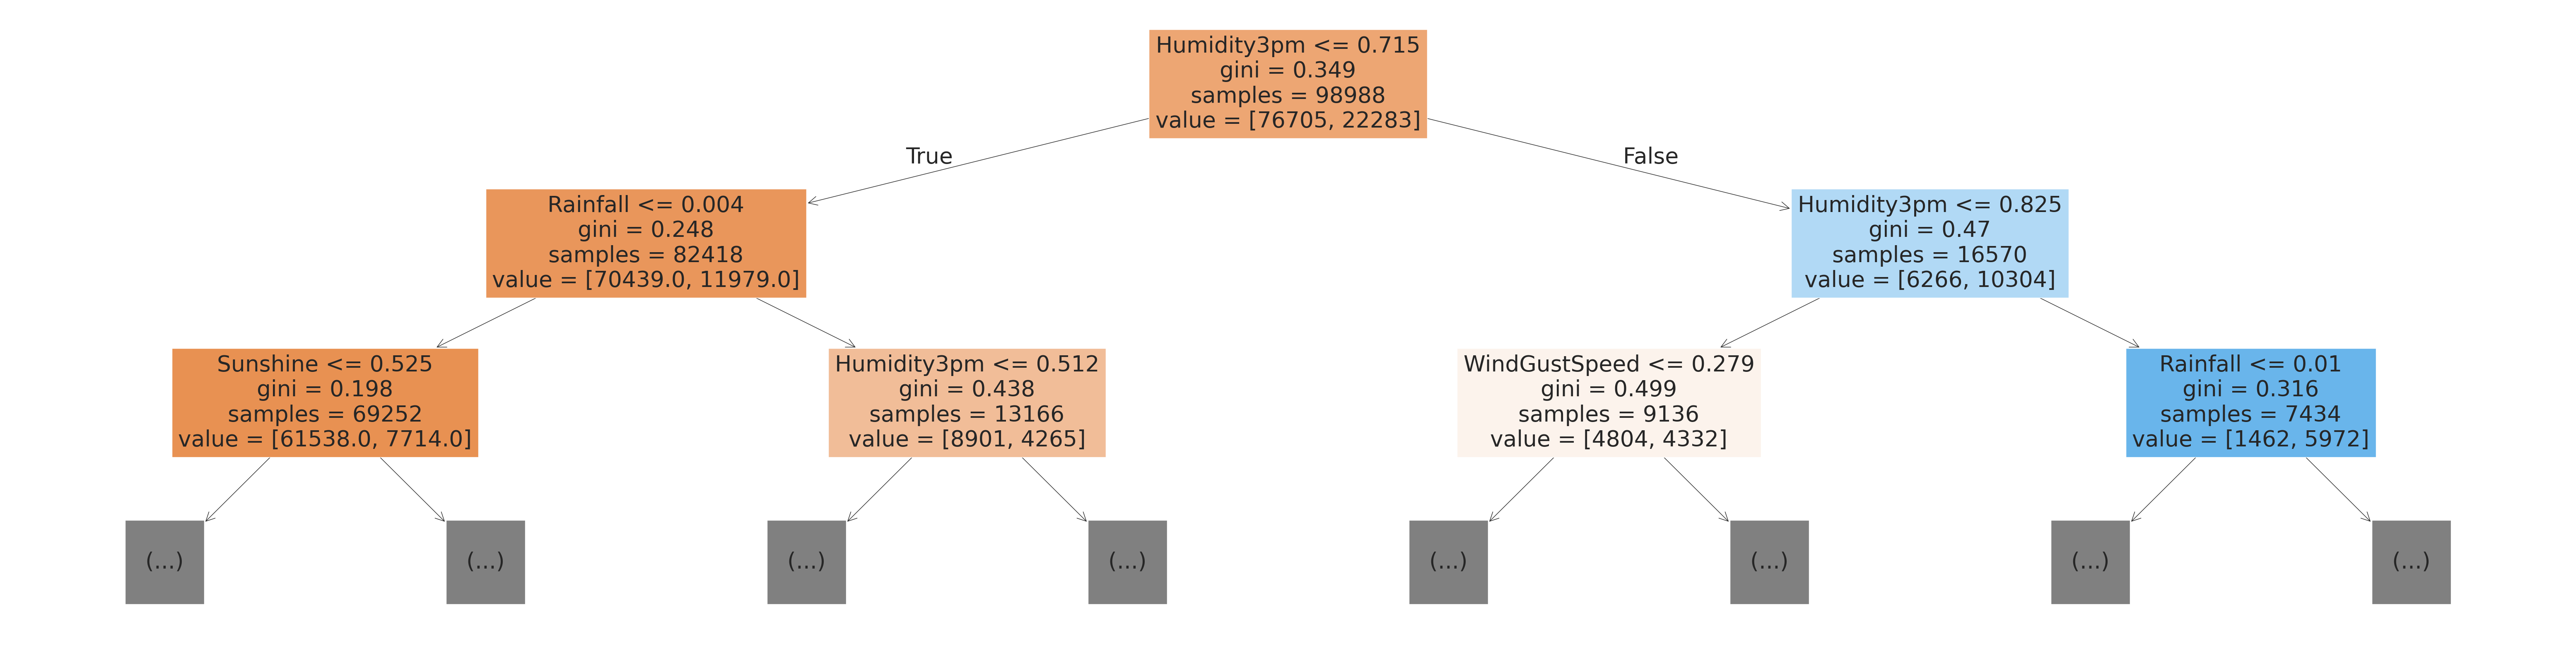

In [139]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=x_train.columns, max_depth=2,filled=True);


In [140]:
importance_df =pd.DataFrame(
    {'feature':x_train.columns, 'importance':model.feature_importances_}
).sort_values('importance',ascending=False)


In [141]:
importance_df.head(10)

,feature,importance
9,Humidity3pm,0.268508
11,Pressure3pm,0.077138
2,Rainfall,0.067853
5,WindGustSpeed,0.065102
4,Sunshine,0.061720
8,Humidity9am,0.052576
0,MinTemp,0.051729
10,Pressure9am,0.051233
1,MaxTemp,0.048276
14,Temp9am,0.048260


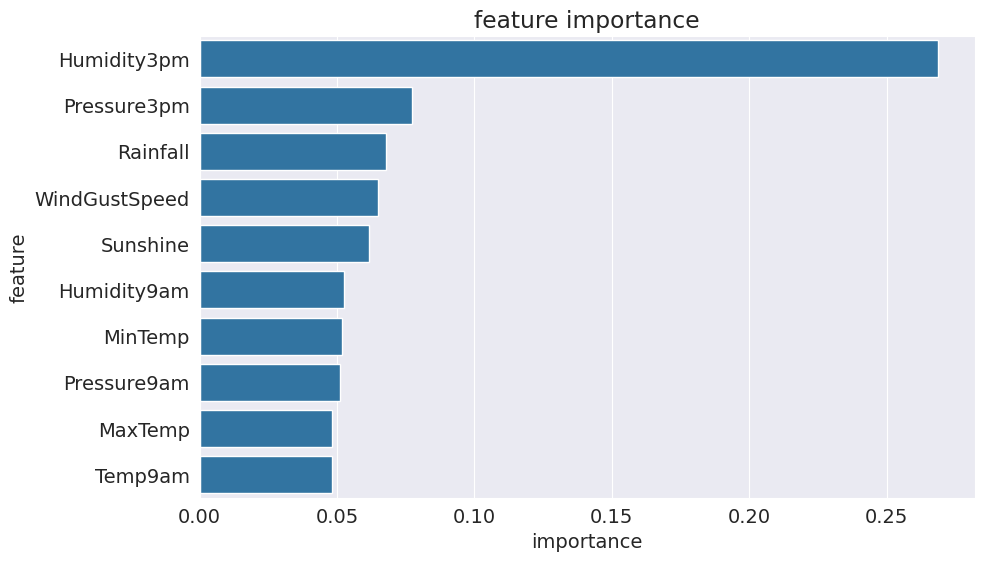

In [142]:
plt.title('feature importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

In [143]:
model = DecisionTreeClassifier(max_depth=3, random_state=42)

In [145]:
model.fit(x_train, train_tragets)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [146]:
model.score(x_train, train_tragets)

0.8291308037337859

In [147]:
model.score(x_val, val_tragets)

0.8334397307178921